<a href="https://colab.research.google.com/github/rujhannajib/rujhan_ndl/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Loading Iris Data
iris  = load_iris()
data = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
Y = list(iris.target)
data['target'] = Y

In [ ]:
class1 = data[data['target'] == 0]
class2 = data[data['target'] == 1]
class3 = data[data['target'] == 2]

Text(0, 0.5, 'petal_width')

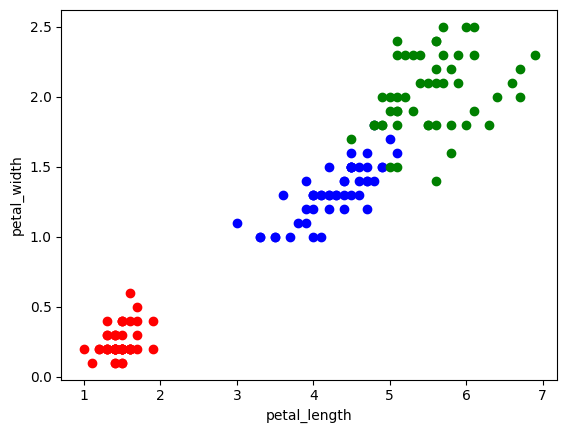

In [ ]:
plt.scatter(class1.iloc[:, 2], class1.iloc[:, 3], color='red')
plt.scatter(class2.iloc[:, 2], class2.iloc[:, 3], color='blue')
plt.scatter(class3.iloc[:, 2], class3.iloc[:, 3], color='green')
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[3])

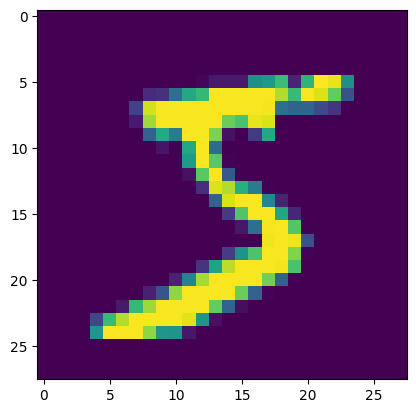

In [ ]:
#Loading MNIST Datt
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain, xtest = np.array(xtrain)[:1000], np.array(xtest)
ytrain = ytrain[:1000]
plt.imshow(xtrain[0])

In [ ]:
xtrain = [x.flatten() for x in xtrain]
xtest = [x.flatten() for x in xtest]

## Trying models on each dataset

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import tensorflow as tf
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

### MNIST

In [ ]:
svm = SVC()
svm.fit(xtrain, ytrain)

predictions = svm.predict(xtest)
print("Accuracy: " + str(metrics.accuracy_score(predictions, ytest)))

0.9083

In [ ]:
xgboost = GradientBoostingClassifier()
xgboost.fit(xtrain, ytrain)

predictions = xgboost.predict(xtest)
print("Accuracy: " + str(metrics.accuracy_score(predictions, ytest)))

0.8454

In [ ]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(xtrain, ytrain)

predictions = xgboost.predict(xtest)
print("Accuracy: " + str(metrics.accuracy_score(predictions, ytest)))

Accuracy: 0.8666666666666667


## Iris Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.iloc[:, :4]
Y = data.iloc[:, 4]
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [ ]:
svm = SVC()
svm.fit(xtrain, ytrain)

predictions = svm.predict(xtest)
print("Accuracy: " + str(metrics.accuracy_score(predictions, ytest)))

Accuracy: 0.9666666666666667


In [ ]:
xgboost = GradientBoostingClassifier()
xgboost.fit(xtrain, ytrain)

predictions = xgboost.predict(xtest)
print("Accuracy: " + str(metrics.accuracy_score(predictions, ytest)))

Accuracy: 0.8666666666666667


Text(0.5, 1.0, 'Feature improtances from XGBoost')

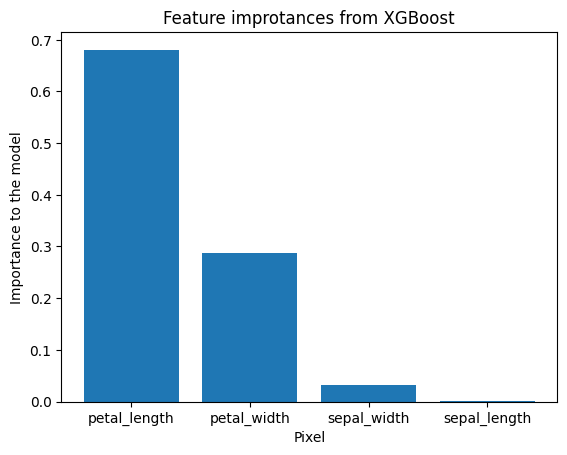

In [ ]:
importances = xgboost.feature_importances_
indices = np.argsort(importances)[::-1]
featureNames = [xtrain.columns[i] for i in indices]
plt.bar(featureNames[:15], importances[indices][:15])
plt.xlabel("Pixel")
plt.ylabel("Importance to the model")
plt.title("Feature improtances from XGBoost")

In [ ]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(xtrain, ytrain)

predictions = decisionTree.predict(xtest)
print("Accuracy: " + str(metrics.accuracy_score(predictions, ytest)))

Accuracy: 0.9


[Text(0.4, 0.9, 'petal_width <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [40, 42, 38]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.7, 'petal_width <= 1.7\ngini = 0.499\nsamples = 80\nvalue = [0, 42, 38]'),
 Text(0.2, 0.5, 'petal_length <= 5.0\ngini = 0.089\nsamples = 43\nvalue = [0, 41, 2]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.3, 0.3, 'sepal_width <= 2.75\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.5, 'petal_length <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'sepal_width <= 3.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

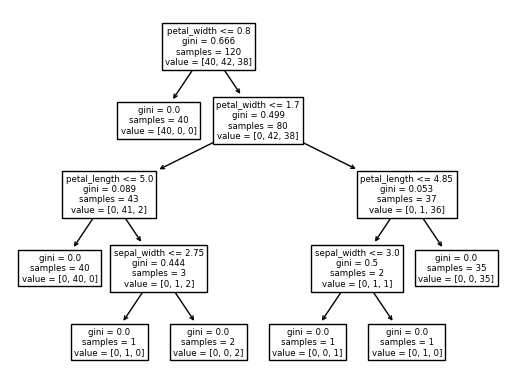

In [ ]:
plot_tree(decisionTree, feature_names=xtrain.columns)